## Importation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
%pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC

2024-08-07 19:21:44.771715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 19:21:44.771852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 19:21:44.947100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [6]:
from joblib import load,dump
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,Conv1D, MaxPooling1D
from tensorflow.keras import regularizers

In [7]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [8]:
from Bio import SeqIO
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [10]:
path="data/"
ET_f="element_transposable.fasta"
EnT_f="Elements_non_transposables"

## read/visualisation dataset

### Function Read data

In [11]:
import pandas as pd

def read_fasta(file_path, dataclass, classname):
    with open(file_path, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Initialize empty lists to store sequence IDs and sequences
    sequence_ids = []
    sequences = []
    labels = []
    names = []
    lengths = []

    # Initialize variables to store the current sequence ID and sequence
    current_sequence_id = None
    current_sequence = []

    # Iterate through the lines in the file
    for line in lines:
        line = line.strip().lower()

        # Check if the line is a header line (starts with '>')
        if line.startswith('>'):
            # If a sequence is already being processed, store it
            if current_sequence_id is not None:
                full_sequence = ''.join(current_sequence)
                sequence_ids.append(current_sequence_id)
                sequences.append(full_sequence)
                labels.append(dataclass)
                names.append(classname)
                lengths.append(len(full_sequence))

            # Update current sequence ID
            current_sequence_id = line[1:]
            # Reset current sequence
            current_sequence = []
        else:
            # Append the sequence line to the current sequence
            current_sequence.append(line)

    # Add the last sequence to the lists
    if current_sequence_id is not None:
        full_sequence = ''.join(current_sequence)
        sequence_ids.append(current_sequence_id)
        sequences.append(full_sequence)
        labels.append(dataclass)
        names.append(classname)
        lengths.append(len(full_sequence))

    # Create a DataFrame with sequence IDs and sequences
    df = pd.DataFrame({'Sequence_ID': sequence_ids, 'Sequence': sequences, 'Label': labels, 'Classname': names, 'Sequence Length': lengths})
    return df


In [12]:
import pandas as pd

def read_fasta2(file_path, dataclass, classname):
    with open(file_path, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Initialize empty lists to store sequence IDs and sequences
    sequence_ids = []
    sequences = []
    labels = []
    names = []
    lengths = []

    # Initialize variables to store the current sequence ID and sequence
    current_sequence_id = None
    current_sequence = []

    # Iterate through the lines in the file
    for line in lines:
        # line = line.strip().lower()

        # Check if the line is a header line (starts with '>')
        if line.startswith('>'):
            # If a sequence is already being processed, store it
            if current_sequence_id is not None:
                full_sequence = ''.join(current_sequence)
                sequence_ids.append(current_sequence_id)
                sequences.append(full_sequence)
                labels.append(dataclass)
                names.append(classname)
                lengths.append(len(full_sequence))

            # Update current sequence ID
            current_sequence_id = line[1:]
            # Reset current sequence
            current_sequence = []
        else:
            # Append the sequence line to the current sequence
            current_sequence.append(line)

    # Add the last sequence to the lists
    if current_sequence_id is not None:
        full_sequence = ''.join(current_sequence)
        sequence_ids.append(current_sequence_id)
        sequences.append(full_sequence)
        labels.append(dataclass)
        names.append(classname)
        lengths.append(len(full_sequence))

    # Create a DataFrame with sequence IDs and sequences
    df = pd.DataFrame({'Sequence_ID': sequence_ids, 'Sequence': sequences, 'Label': labels, 'Classname': names, 'Sequence Length': lengths})
    return df


### read data

In [13]:
ET_d = read_fasta("/kaggle/input/dataetent1/element_transposable.fasta",1,'ET') #for transposable elements label 1
dataX=read_fasta2("/kaggle/input/dataetent1/repbaseclasse2.fa",1, 'ET')
EnT_d = read_fasta("/kaggle/input/dataetent1/Elements_non_transposables",0,'EnT') #for NON transposable elements label 0
EnT_d_2 = read_fasta("/kaggle/input/dataetent1/EnT.fasta",0,'EnT')
EnT_d_3 = read_fasta("/kaggle/input/dataetent1/EnT2.fasta",0,'EnT')
EnT_d_4 = read_fasta("/kaggle/input/dataetent2/EnT3.fasta",0,'EnT')

In [14]:
print("ET_d.shape\t",ET_d.shape,"\nEnT_d.shape\t",EnT_d.shape,"\ndataX.shape\t",dataX.shape,"\nEnT_d_2.shape\t",EnT_d_2.shape,"\nEnT_d_3.shape\t",EnT_d_3.shape,"\nEnT_d_4.shape\t",EnT_d_4.shape)

ET_d.shape	 (5741, 5) 
EnT_d.shape	 (1373, 5) 
dataX.shape	 (9597, 5) 
EnT_d_2.shape	 (714, 5) 
EnT_d_3.shape	 (993, 5) 
EnT_d_4.shape	 (601792, 5)


In [15]:
p_element_d=read_fasta("/kaggle/input/familles2/p_MITE1.fasta",1,'ET') #2 for P_MITE
TC1_MARINER_d=read_fasta("/kaggle/input/familles2/TC1_MARINER_MITE.fasta",1,'ET') #2 for P_MITE
hAT_d=read_fasta("/kaggle/input/familles2/hAT.fasta",1,'ET') #3 for HAT_MITE
hAT_d_2=read_fasta("/kaggle/input/familles2/HAT_MITE.fasta",1,'ET') #3 for HAT_MITE
piggyBac_d=read_fasta("/kaggle/input/familles2/piggyBac.fasta",1,'ET') #4 for PiggyBac
piggyBac__d=read_fasta("/kaggle/input/familles2/piggyBac_.fasta",1,'ET') #4 for PiggyBac
piggyBac_d_2=read_fasta("/kaggle/input/familles2/PiggyBac1.fasta",1,'ET') #4 for PiggyBac
Merlin_d=read_fasta("/kaggle/input/familles2/merlindata.fasta",1,'ET') # for merlin
merlin_d_2=read_fasta("/kaggle/input/familles2/merlindata_2.fasta",1,'ET') # for merlin
P_element_d_2=read_fasta("/kaggle/input/familles2/P_MITE2.fasta",1,'ET') #2 for P_MITE
P_element_d_3=read_fasta("/kaggle/input/familles2/sequencesPelemnt.fasta",1,'ET')
PiggyBacNew_d=read_fasta("/kaggle/input/familles2/PiggyBacNew.fasta",1,'ET') #2 for P_MITE
MutatorNew_d=read_fasta("/kaggle/input/familles2/MutatorNew.fasta",1,'ET') #2 for P_MITE
CACTANew_d=read_fasta("/kaggle/input/familles2/CACTANew.fasta",1,'ET') #2 for P_MITE
ETDfam_d=read_fasta("/kaggle/input/dataetent3/ETDfam.fasta",1,'ET') #2 for P_MITE
ETDfam2_d=read_fasta("/kaggle/input/dataetent3/ETDfam10.fasta",1,'ET') #2 for P_MITE
ETDfam3_d=read_fasta("/kaggle/input/dataetent3/ETDfam2.fasta",1,'ET') #2 for P_MITE
ETDfam4_d=read_fasta("/kaggle/input/dataetent3/ETDfam3.fasta",1,'ET') #2 for P_MITE
ETDfam5_d=read_fasta("/kaggle/input/dataetent3/ETDfam4.fasta",1,'ET') #2 for P_MITE
ETDfam6_d=read_fasta("/kaggle/input/dataetent3/ETDfam5.fasta",1,'ET') #2 for P_MITE
ETDfam7_d=read_fasta("/kaggle/input/dataetent3/ETDfam6.fasta",1,'ET') #2 for P_MITE
ETDfam8_d=read_fasta("/kaggle/input/dataetent3/ETDfam7.fasta",1,'ET') #2 for P_MITE
ETDfam9_d=read_fasta("/kaggle/input/dataetent3/ETDfam8.fasta",1,'ET') #2 for P_MITE
ETDfam10_d=read_fasta("/kaggle/input/dataetent3/ETDfam9.fasta",1,'ET') #2 for P_MITE
p_ele_d=read_fasta("/kaggle/input/p-ele-d/p_ele_d.fasta",1,'ET')

In [84]:
ET_totalData=pd.concat([ET_d, 
                        dataX,p_ele_d,
                        TC1_MARINER_d,hAT_d_2,
                        p_element_d,
                        hAT_d,piggyBac_d,piggyBac__d,
                        Merlin_d, 
                        P_element_d_2,
                        P_element_d_3,
                        PiggyBacNew_d,piggyBac_d_2,MutatorNew_d,
                        CACTANew_d,
                        merlin_d_2,
                        ETDfam_d,ETDfam2_d,ETDfam3_d,ETDfam4_d,ETDfam5_d,ETDfam6_d,ETDfam7_d,ETDfam8_d,ETDfam9_d,ETDfam10_d
                        ], 
                       axis=0, ignore_index=True)

In [85]:
ET_totalData.shape

(139346, 5)

In [86]:
EnT_totalData=pd.concat([EnT_d,
                         EnT_d_2,
                         EnT_d_3,EnT_d_4
                        ], axis=0, ignore_index=True)

In [87]:
EnT_totalData.shape

(604872, 5)

## Unbalanced dataset

In [ ]:
# as you can see the shapes are not equals we have a biased  or unbalanced dataset that can effect the model performance we had to
#Rééchantilloner le jeux de donnees soit le undersimpling(Sous-échantillonnage) ou oversimpling(Sur-échantillonnage)
"""Oversampling — Duplicating samples from the minority class
Le sous-échantillonnage est généralement préférable lorsque la quantité de données disponibles est moindre ou lorsqu’un
ensemble de données doit être simplifié. Il nécessite la collecte d’une quantité moindre de données, ce qui réduit le temps
et les coûts1. De plus, il peut contribuer à réduire la complexité d’un ensemble de données, ce qui en facilite l’analyse. Cependant, le sous-échantillonnage
peut entraîner une sous-représentation des points de données, ce qui peut conduire à des résultats inexacts"""

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#creating the instance for random over sampler
randomOverSampler = RandomOverSampler()

#performing resampling
X_over, y_over = randomOverSampler.fit_resample(X, y)
Counter(y_over)

# Sous-échantillonnage
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(Labled_data['Sequence'], Labled_data['Label'])

## Pre-processing

### Pre-processing Functions

In [88]:
def dataPreprocessing(data):
  tc1=0
  p=0
  MuDR=0
  hAT=0
  PiggyBac=0
  Merlin=0
  CACTA=0

  for i in data:
    if  "\tmariner/tc1".casefold() in i.casefold() :
        tc1+=1
    if  "kw=DNA/TcMar-Mariner.".casefold() in i.casefold() :
        tc1+=1

    if "\tP\t".casefold() in i.casefold() :
        p+=1
    if "KW=DNA/P.".casefold() in i.casefold() :
        p+=1
    if "kw=dna/p-fungi.".casefold() in i.casefold() :
        p+=1

    if "\tMuDR\t".casefold() in i.casefold() :
        MuDR+=1
    if "KW=DNA/MULE-MuDR.".casefold() in i.casefold() :
        MuDR+=1
    if "KW=DNA/PiggyBac.".casefold() in i.casefold() :
        PiggyBac+=1
    if "\thAT\t".casefold() in i.casefold() :
        hAT+=1
    if "KW=DNA/hAT".casefold() in i.casefold() :
        hAT+=1
    if "tc1-mariner_mite".casefold() in i.casefold() :
        tc1+=1
    if 'P_MITE'.casefold() in i.casefold() :
        p+=1
    if 'dna-transposon, tir, p'.casefold() in i.casefold() :
        p+=1

    if  'Mutator'.casefold()  in i.casefold() :
        MuDR+=1
    if  ' dna-transposon, tir, Mutator'.casefold()  in i.casefold() :
        MuDR+=1
    if "\tPiggyBac\t".casefold() in i.casefold():
        PiggyBac+=1
    if " dna-transposon, tir, PiggyBac".casefold() in i.casefold():
        PiggyBac+=1
    if "\tMerlin\t".casefold() in i.casefold():
        Merlin+=1
    if "merlin".casefold() in i.casefold():
        Merlin+=1
    if "kw=DNA/Merlin.".casefold() in i.casefold():
        Merlin+=1
    if "Mer [organism=drosophila".casefold() in i.casefold():
        Merlin+=1
    if "CACTA\t".casefold() in i.casefold():
        CACTA+=1
    if "DNA-transposon, TIR, CACTA".casefold() in i.casefold():
        CACTA+=1
    

  print("TC1_MARINER_MITE : ", tc1)
  print("P : ", p)
  print("HAT : ", hAT)
  print("PiggyBac : ", PiggyBac)
  print("Mutator : ", MuDR)
  print("Merlin : ", Merlin)
  print("CACTA : ", CACTA)

In [73]:
def dropDuplicates(data):
  print("old shape=",data.shape)
  df_unique = data.drop_duplicates(subset='Sequence')
  print("new shape=",df_unique.shape)
  return df_unique

In [89]:
import pandas as pd

def eliminateDataless(data):

    tc1 = 0
    p = 0
    MuDR = 0
    hAT = 0
    PiggyBac = 0
    Merlin = 0
    CACTA = 0
    # Convert 'Sequence_ID' to lowercase for case-insensitive comparison
    data['Sequence_ID_lower'] = data['Sequence_ID'].str.casefold()

    # Define conditions for each category
    conditions = {
        "TC1_Mariner": (data['Sequence_ID_lower'].str.contains("\tmariner/tc1") & (data['Sequence Length'] >= 1300)) |
                            (data['Sequence_ID_lower'].str.contains("tc1-mariner_mite") & (data['Sequence Length'] >= 1300)) |
        (data['Sequence_ID_lower'].str.contains("kw=dna/tcmar-mariner.") & (data['Sequence Length'] >= 1300))  ,

        "P_Element": (data['Sequence_ID_lower'].str.contains("\tp\t") & (data['Sequence Length'] >= 2900)) |
             (data['Sequence_ID_lower'].str.contains('p_mite') & (data['Sequence Length'] >= 2900)) |
             (data['Sequence_ID_lower'].str.contains(' dna-transposon, tir, p') & (data['Sequence Length'] >= 2900)) |
              (data['Sequence_ID_lower'].str.contains('kw=dna/p.') & (data['Sequence Length'] >= 2900)) |
        (data['Sequence_ID_lower'].str.contains('kw=dna/p-fungi.') & (data['Sequence Length'] >= 2900))
              ,

        "MuDR": (data['Sequence_ID_lower'].str.contains("\tmudr\t") & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains('mutator') & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains(" dna-transposon, tir, mutator")   & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains("kw=dna/mule-mudr.")   & (data['Sequence Length'] >= 4000)),

        "HAT": (data['Sequence_ID_lower'].str.contains("\that\t") & (data['Sequence Length'] >= 2000))|
        (       data['Sequence_ID_lower'].str.contains("kw=dna/hat") & (data['Sequence Length'] >= 2000)),

        "PiggyBac": data['Sequence_ID_lower'].str.contains("\tpiggybac\t") |
                    data['Sequence_ID_lower'].str.contains(" dna-transposon, tir, piggybac") |
                    data['Sequence_ID_lower'].str.contains("kw=dna/piggybac.c"),

        "Merlin": data['Sequence_ID_lower'].str.contains("\tmerlin\t") |
                  data['Sequence_ID_lower'].str.contains("mer \[organism=drosophila") |
                  data['Sequence_ID_lower'].str.contains("merlin") |
                  data['Sequence_ID_lower'].str.contains("kw=dna/merlin."),

        "CACTA":( data['Sequence_ID_lower'].str.contains("cacta\t") & (data['Sequence Length'] >= 3000))|
                ( data['Sequence_ID_lower'].str.contains("dna-transposon, tir, casta") & (data['Sequence Length'] >= 3000) )
    }

    # Filter the data based on conditions and add a new column for the category
    filtered_data = pd.DataFrame()
    for category, condition in conditions.items():
        temp_data = data[condition].copy()
        temp_data['Category'] = category
        filtered_data = pd.concat([filtered_data, temp_data], ignore_index=True)

    # Drop the auxiliary column used for case-insensitive matching
    filtered_data.drop(columns=['Sequence_ID_lower'], inplace=True)
    # Calculate counts for each condition
    tc1 = data[conditions['TC1_Mariner']].shape[0]
    p = data[conditions['P_Element']].shape[0]
    MuDR = data[conditions['MuDR']].shape[0]
    hAT = data[conditions['HAT']].shape[0]
    PiggyBac = data[conditions['PiggyBac']].shape[0]
    Merlin = data[conditions['Merlin']].shape[0]
    CACTA = data[conditions['CACTA']].shape[0]

    # Print results
    print("TC1_Mariner : ", tc1)
    print("P_Element : ", p)
    print("HAT : ", hAT)
    print("PiggyBac : ", PiggyBac)
    print("Mutator/MuDR : ", MuDR)
    print("Merlin : ", Merlin)
    print("CACTA : ", CACTA)

    return filtered_data




In [28]:
def substituer_nucl(seqs) :
  new_seqs = []
  for seq in seqs :
    s = list(seq)
    for i in range(0, len(s)) :
        if s[i] not in ['a','t','c','g'] :
            s[i] = 'z'
    new_seqs.append(''.join(s))
  return new_seqs

In [29]:

def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [30]:

def join_kmers(seqs) :
  x = seqs
  for item in range(len(seqs)):
      x[item] = ' '.join(x[item])
  return x

### Data pre-processing


In [90]:
dataPreprocessing(ET_totalData['Sequence_ID'])

TC1_MARINER_MITE :  9138
P :  6589
HAT :  109285
PiggyBac :  5663
Mutator :  3391
Merlin :  4222
CACTA :  1083


In [91]:
afterdropdup=dropDuplicates(ET_totalData)

old shape= (139346, 5)
new shape= (132525, 5)


In [92]:
EnT_totalData=dropDuplicates(EnT_totalData)

old shape= (604872, 5)
new shape= (604783, 5)


In [93]:
dataPreprocessing(afterdropdup['Sequence_ID'])

TC1_MARINER_MITE :  7478
P :  4043
HAT :  107534
PiggyBac :  5277
Mutator :  3387
Merlin :  3988
CACTA :  1080


In [94]:
filtered_data = eliminateDataless(afterdropdup)

TC1_Mariner :  1848
P_Element :  775
HAT :  9131
PiggyBac :  757
Mutator/MuDR :  614
Merlin :  2085
CACTA :  488


In [95]:
EnT_totalData.shape

(604783, 5)

In [96]:
filtered_data.shape

(15698, 6)

In [97]:
ET_d_=filtered_data.iloc[:,1:]
EnT_d_=EnT_totalData.iloc[:,1:]

In [98]:
ET_d_=ET_d_.sample(frac=1)
EnT_d_=EnT_d_.sample(frac=1)

In [99]:
ET_d_['Category'].value_counts()

Category
HAT            9131
Merlin         2085
TC1_Mariner    1848
P_Element       775
PiggyBac        757
MuDR            614
CACTA           488
Name: count, dtype: int64

In [100]:
# Step 1: Extract all rows for 'P' and 'Merlin'
# p_merlin_data = ET_d_[ET_d_['Category'].isin(['P', 'Merlin'])]

# Step 2: Define the desired number of samples for each category
desired_counts = {
    "TC1_Mariner": 488,
#     650,
    "HAT":  488,
#     600,
    "PiggyBac":  488,
#     757,
    "MuDR":  488,
#     614,
    "CACTA":  488,
#     488,
    "P_Element": 488,
    "Merlin": 488,
#     700
}

# Step 3: Sample the rows for each of the specified categories, with checks
sampled_data_list = []

for category, count in desired_counts.items():
    available_count = ET_d_[ET_d_['Category'] == category].shape[0]
    if available_count >= count:
        sampled_data = ET_d_[ET_d_['Category'] == category].sample(n=count, random_state=42)
        sampled_data_list.append(sampled_data)
    else:
        print(f"Not enough data to sample {count} rows from category {category}. Available: {available_count}")

# Combine all sampled data
sampled_data = pd.concat(sampled_data_list)

# Combine the data
# final_data = pd.concat([p_merlin_data, sampled_data])

# Verify the counts
final_class_counts = sampled_data['Category'].value_counts()

print(final_class_counts)
print("Total count:", sampled_data.shape[0])

Category
TC1_Mariner    488
HAT            488
PiggyBac       488
MuDR           488
CACTA          488
P_Element      488
Merlin         488
Name: count, dtype: int64
Total count: 3416


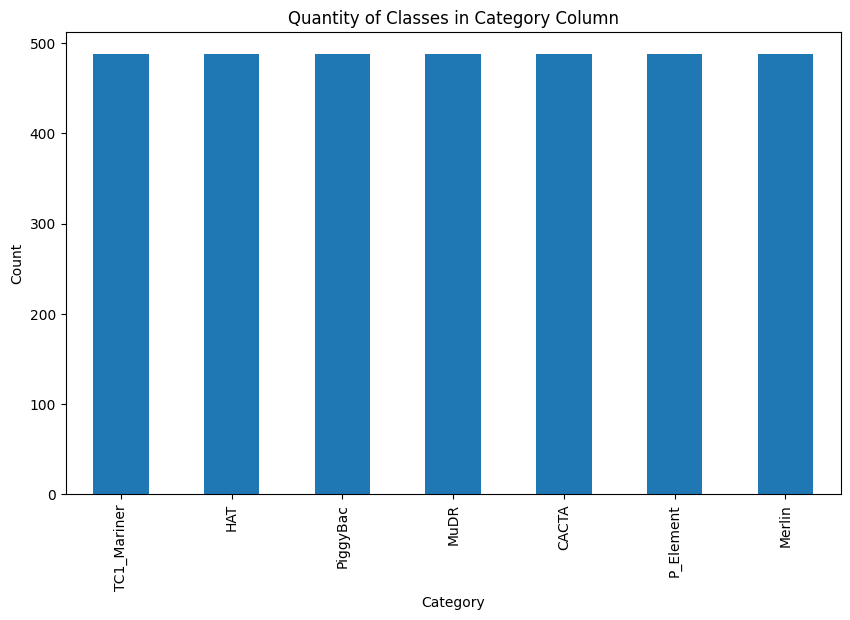

In [101]:
import matplotlib.pyplot as plt

# Plot the class counts
final_class_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Quantity of Classes in Category Column')
plt.show()


In [102]:
Labled_data = pd.concat([sampled_data, EnT_d_[:sampled_data.shape[0]]],ignore_index=True, axis = 0 )
Labled_data['Category'].fillna('EnT', inplace=True)

In [103]:
Labled_data.shape

(6832, 5)

In [105]:
Labled_data=Labled_data.sample(frac=1)
Labled_data.head()

,Sequence,Label,Classname,Sequence Length,Category
6714,atgcccatccctgtcggcttacgcaagtcccagatgattcctccca...,0,EnT,1062,EnT
3154,gtattacaataaaggtcaattcggggactgtctgtgtattttaatt...,1,ET,1816,Merlin
1615,gggaaaaatgcccatacaccccttaaacttttaactactggtcaaa...,1,ET,5854,MuDR
3601,atggatagtttttacgacggtgatttgaaggatatctgggattcag...,0,EnT,1560,EnT
714,tttttttnataaaatgctttttgaggaaaaaacctatctaaagata...,1,ET,3468,HAT


In [106]:
counts = Labled_data['Label'].value_counts()
counts_dict = counts.to_dict()
counts_dict

{0: 3416, 1: 3416}

In [107]:
labels = list(counts_dict.keys())
values = list(counts_dict.values())

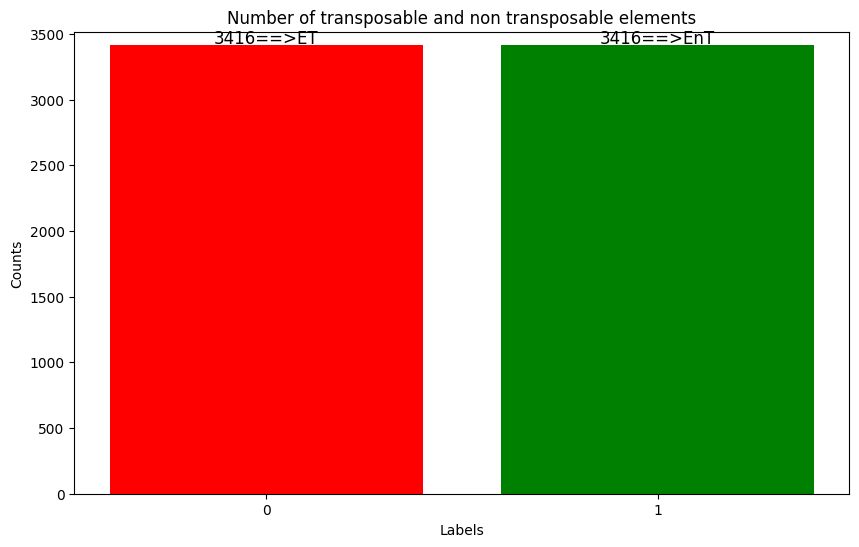

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Number of transposable and non transposable elements')
plt.xticks(labels)
plt.ylim(0, max(values) + 100)
lab=["ET","EnT"]
n=0
# Adding the counts on top of the bars
for i in range(len(labels)):
    plt.text(labels[i], values[i] + 10, str(values[i])+"==>"+lab[i], ha='center', fontsize=12)
    n+=1

plt.show()

In [109]:
for seq in Labled_data['Sequence']:
    if 'z' in seq:
        display(Labled_data.loc[Labled_data['Sequence'] == seq])

### save data after pre-pro


In [ ]:
def save_dataframe_to_fasta(df, output_filename):
    with open(output_filename, 'w') as fasta_file:
        for index, row in df.iterrows():
            fasta_file.write(f">{row['Category']},{row['Sequence_ID']}\n")
            fasta_file.write(f"{row['Sequence']}\n")
def save_dataframe_to_fasta2(df, output_filename):
    with open(output_filename, 'w') as fasta_file:
        for index, row in df.iterrows():
            fasta_file.write(f">{row['Classname']},{row['Sequence_ID']}\n")
            fasta_file.write(f"{row['Sequence']}\n")

In [ ]:
save_dataframe_to_fasta(filtered_data.sample(frac=1), path+'ET_d_.fasta')
save_dataframe_to_fasta2(EnT_totalData.sample(frac=1), path+'EnT_d_.fasta')

In [ ]:
# X = [seq for seq in Labled_data['Sequence']]

In [ ]:
# len(X)

In [ ]:
# X = substituer_nucl(X)

In [ ]:
# X  = [Kmers_funct(i, 6) for i in X ]

In [ ]:
# X  = join_kmers(X)

## Knowledge discovery

### split data

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    Labled_data[['Sequence', 'Category']], Labled_data['Label'], test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state=42)



### data vectorisation

In [61]:

with open("/kaggle/input/k6/other/default/2/features_to_keep_tfidf_k6.pkl", 'rb') as file:
    features_to_keep = pickle.load(file)

In [111]:

k=7
# vectorizer=CountVectorizer()
# vecto="CountVectorizer"
vectorizer= TfidfVectorizer()
vecto="TfidfVectorizer"
# vectorizer=load("/kaggle/input/k6/other/default/2/tfidf_vectorizer_k6.joblib")

In [63]:

def select_features_and_to_dense(sequences_df, features_to_keep):
    features_to_keep=list(features_to_keep)
    return sequences_df[features_to_keep].values


#### train

In [112]:
sequences_train = [seq for seq in X_train['Sequence']]
sequences_train = substituer_nucl(sequences_train)
sequences_train = [Kmers_funct(i, size=k) for i in sequences_train]
sequences_train = join_kmers(sequences_train)
sequences_train = vectorizer.fit_transform(sequences_train)


In [113]:
sequences_train.shape

(4372, 54126)

In [65]:
sequences_train_dense = sequences_train.todense()
# Create a DataFrame from the dense matrix
sequences_train_df = pd.DataFrame(sequences_train_dense)


In [ ]:
# with tf.device('/GPU:0'):

# Compute the correlation matrix
correlationMatrix = sequences_train_df.corr()

# Plot the heatmap
# plt.figure(figsize=(20,20))
# sns.heatmap(correlationMatrix, annot=True, cmap="PiYG", fmt=".2f", linewidths=.5)
# plt.show()

In [51]:
threshold = 0.8

# Dictionary to hold highly correlated feature pairs
highly_correlated_pairs = []

# Identify highly correlated pairs
for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlationMatrix.columns[i], correlationMatrix.columns[j]))

# Set to hold features to keep
features_to_keep = set(correlationMatrix.columns)

# Remove one feature from each highly correlated pair
for feature1, feature2 in highly_correlated_pairs:
    if feature1 in features_to_keep and feature2 in features_to_keep:
        # Use domain knowledge or other criteria here to decide which to keep
        # For simplicity, let's keep the feature with the lower index
        features_to_keep.remove(feature2 if feature1 < feature2 else feature1)

# Final features to keep
# print("Features to keep:", features_to_keep)

# Filter the dataset to keep only the selected features
sequences_train_final = sequences_train_df[list(features_to_keep)]

In [66]:
# Filter the dataset to keep only the selected features
sequences_train_final = select_features_and_to_dense(sequences_train_df, features_to_keep)


In [90]:
sequences_train.shape

(1639, 11689)

In [57]:
sequences_train_final.shape

(1639, 6983)

In [58]:
type(sequences_train_final)

numpy.ndarray

#### corre 2

In [72]:
type(sequences_train_final)

numpy.ndarray

In [73]:

sequences_train_final_df = pd.DataFrame(sequences_train_final)
correlationMatrix = sequences_train_final_df.corr()


In [74]:
threshold = 0.8

# Dictionary to hold highly correlated feature pairs
highly_correlated_pairs = []

# Identify highly correlated pairs
for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlationMatrix.columns[i], correlationMatrix.columns[j]))

# Set to hold features to keep
features_to_keep_2 = set(correlationMatrix.columns)

# Remove one feature from each highly correlated pair
for feature1, feature2 in highly_correlated_pairs:
    if feature1 in features_to_keep_2 and feature2 in features_to_keep_2:
        # Use domain knowledge or other criteria here to decide which to keep
        # For simplicity, let's keep the feature with the lower index
        features_to_keep_2.remove(feature2 if feature1 < feature2 else feature1)


In [75]:
# train
sequences_train_final =select_features_and_to_dense( sequences_train_final_df,features_to_keep_2)

# test
sequences_test_final_df = pd.DataFrame(sequences_test_final)
sequences_test_final = select_features_and_to_dense(sequences_test_final_df, features_to_keep_2)

# val
sequences_val_final_df = pd.DataFrame(sequences_val_final)
sequences_val_final = select_features_and_to_dense(sequences_val_final_df, features_to_keep_2)


In [76]:
sequences_train_final.shape

(1639, 6121)

#### save vectorizer & features to keep

In [54]:
with open(path+'models/features_to_keep_CountVectorizer_k='+str(k)+'.pkl', 'wb') as file:
    pickle.dump(features_to_keep, file)

In [55]:
dump(vectorizer, f"{path}models/CountVectorizer_vectorizer_k={k}.joblib")

['data/models/CountVectorizer_vectorizer_k=6.joblib']

#### test

In [99]:
sequences_test = [seq for seq in X_test['Sequence']]
sequences_test = substituer_nucl(sequences_test)
sequences_test = [Kmers_funct(i, size=k) for i in sequences_test]
sequences_test = join_kmers(sequences_test)
sequences_test = vectorizer.transform(sequences_test)

In [68]:

sequences_test_dense = sequences_test.todense()

# Create a DataFrame from the dense matrix
sequences_test_df = pd.DataFrame(sequences_test_dense)

# sequences_test_final = sequences_test_df[list(features_to_keep)]
sequences_test_final = select_features_and_to_dense(sequences_test_df, features_to_keep)


#### validation

In [100]:
sequences_val = [seq for seq in X_val['Sequence']]
sequences_val = substituer_nucl(sequences_val)
sequences_val = [Kmers_funct(i, size=k) for i in sequences_val]
sequences_val = join_kmers(sequences_val)
sequences_val = vectorizer.transform(sequences_val)

In [70]:

sequences_val_dense = sequences_val.todense()

# Create a DataFrame from the dense matrix
sequences_val_df = pd.DataFrame(sequences_val_dense)

# sequences_val_final = sequences_val_df[list(features_to_keep)]
sequences_val_final = select_features_and_to_dense(sequences_val_df, features_to_keep)


### save test data

In [ ]:
X_test_np = X_test.to_numpy()

# Reshape y_test to be 2D array with one column
y_test_np = y_test.to_numpy().reshape(-1, 1)

# Vertically stack X_test and y_test
stacked_test_data = np.hstack((X_test_np, y_test_np))

# Convert back to DataFrame for easier handling
stacked_test_df = pd.DataFrame(stacked_test_data, columns=['Sequence', 'Category', 'Label'])



In [ ]:
def save_dataframe_to_fasta3(df, output_filename):
    with open(output_filename, 'w') as fasta_file:
        for index, row in df.iterrows():
            fasta_file.write(f">{row['Category']},label={row['Label']}\n")
            fasta_file.write(f"{row['Sequence']}\n")

In [ ]:
save_dataframe_to_fasta3(stacked_test_df,path+"dataTest.fasta")

### Kmeans

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(res) # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure



In [ ]:
visualizer.elbow_value_

In [ ]:
Kmean = KMeans(n_clusters=visualizer.elbow_value_)
Kmean.fit(res)

In [ ]:
dump(Kmean, path+'models/kmeans_model_s4.joblib')

In [ ]:
centroids = Kmean.cluster_centers_
centroids

In [ ]:
data = np.concatenate((res, centroids))

In [ ]:
data.shape
#(8650, 4588)

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(data)

In [ ]:
dfPlot = pd.DataFrame()
dfPlot['x'] = tsne_features[0:1910,0]
dfPlot['y'] = tsne_features[0:1910,1]

In [ ]:
len(dfPlot)

In [ ]:
import seaborn as sns

sns.boxplot(data=dfPlot)
plt.show()

In [ ]:
import seaborn as sns

sns.scatterplot(x='x', y='y', data=dfPlot)
plt.scatter(tsne_features[1910:1911,0], tsne_features[1910:1911,1], marker='*', s=200, color='red')
plt.scatter(tsne_features[1911:1912,0], tsne_features[1911:1912,1], marker='*', s=200, color='red')
plt.show()

In [ ]:
label = Kmean.predict(res)
label

In [ ]:
df2 = pd.DataFrame(label, columns=['C'])

In [ ]:
result = pd.concat([Labled_data, df2], axis=1)

In [ ]:
result.to_excel(path+'dataafter.xlsx', index=False)

In [ ]:
np.unique(label, return_counts=True)


In [ ]:
ress=np.unique(label,return_index=False,return_inverse=False,return_counts=True,axis=None)
ress[1][0]

In [ ]:
A=Kmean.inertia_
print(A)

In [ ]:
sequ=['aagggtgtctcaaaaagaacgccggatttgaaaaggctgctatcctaacctcgatcttgcgacttgacgccgtgtgattttttcttatggggatacactaagtcacgagtttaccagaacaaagtccgaaacgtcttggaacttaagcaagaaattcgtcgtgtcctcaacgaacttgatggggcaatgtgtgatcgagtgatggtaagaataatcgcctgtagggctagtagggggggggtcatatgcccgatgttgtttttcactgttaaacctcaatttatcctgaagagaatgatatatttgtaatgtttttttaagaaaaataaatttaatgtatagcagatttaaatccggcgttctttttgagacaccctt']

In [ ]:
sequ= [seq for seq in Labled_data['Sequence']]

In [ ]:
t = substituer_nucl(sequ)

In [ ]:
t  = [Kmers_funct(i, 6) for i in t ]

In [ ]:
t  = join_kmers(t)

In [ ]:

resu=tfidf_vectorizer.transform(t)

In [ ]:
df = pd.DataFrame(res[0])
df.to_excel(path+'elemtran.xlsx', index=False)

In [ ]:
label = Kmean.predict(res[0].reshape(1,res[0].shape[0]))
label

In [ ]:
label = Kmean.predict(resu)
label

In [ ]:
np.unique(label, return_counts=True)


### Machine learning

#### Random Forest


Evaluating k=6

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best parameters found: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}


	Train model

Epoch 1/30

	Training Accuracy: 0.9990928, Validation Accuracy: 0.9966415, Training Error: 0.0071417, Validation Error: 0.0128209

Epoch 2/30

	Training Accuracy: 0.9990928, Validation Accuracy: 0.9966415, Training Error: 0.0071417, Validation Error: 0.0128209

Epoch 3/30

	Training Accuracy: 0.9990928, Validation Accuracy: 0.9966415, Training Error: 0.0071417, Validation Error: 0.0128209

Epoch 4/30

	Training Accuracy: 0.9990928, Validation Accuracy: 0.9966415, Training Error: 0.0071417, Validation Error: 0.0128209

	Early stopping at epoch 4


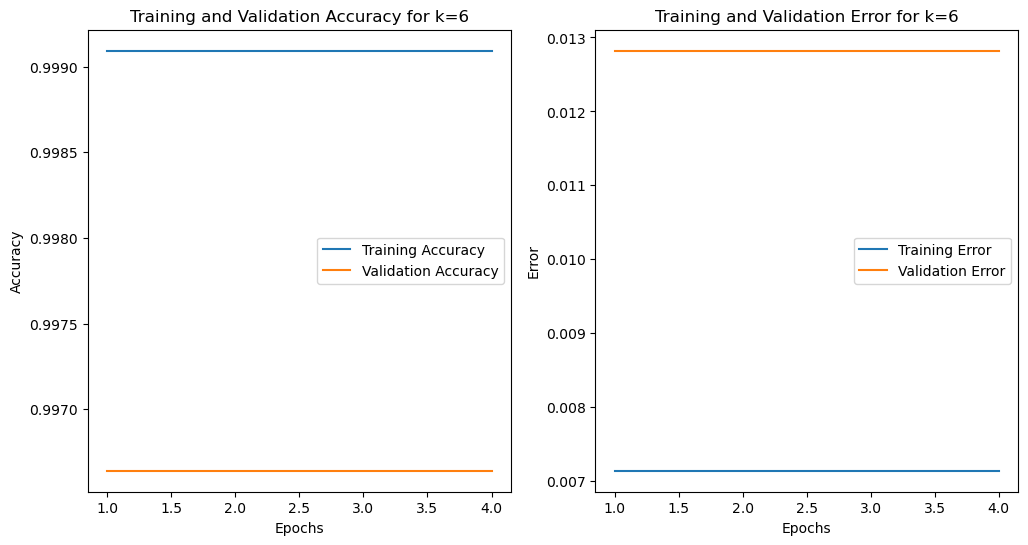

accuracy :  0.9961013645224172

              precision    recall  f1-score   support



           0       0.99      1.00      1.00       273

           1       1.00      0.99      1.00       240



    accuracy                           1.00       513

   macro avg       1.00      1.00      1.00       513

weighted avg       1.00      1.00      1.00       513




	Confusion Matrix:


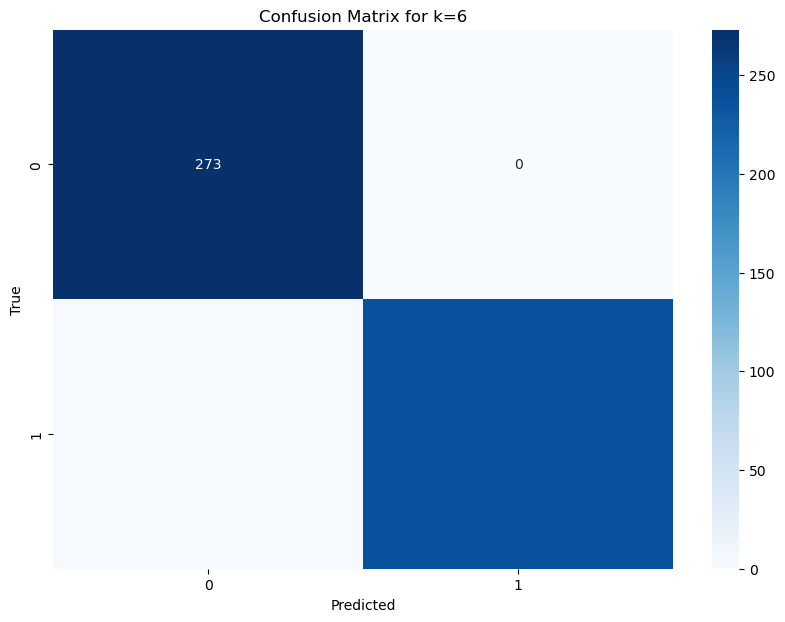


	Save model and vectorizer


In [60]:
def evaluate_kmers_RF(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
# def evaluate_kmers_RF( X_train, X_test, y_train, y_test, X_val, y_val, vectorizer,epochs,patience=3):
    print(f"===============================================================\nEvaluating k={k}")
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [3,6,10],
        'min_samples_split': [6, 8, 10, 20],
        'min_samples_leaf': [2, 4, 12, 15],
        'bootstrap': [True, False]
    }
    model = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = RandomForestClassifier(**best_params, random_state=42)

    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0
    
    print("\t=======================================================================\n\tTrain model")


# Cross-validation setup
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break
    # Ensure same lengths for plotting
    epochs = range(1, len(train_accuracy) + 1)
    if len(train_accuracy) != len(val_accuracy):
        print(f"Warning: Length mismatch between train and validation accuracy: {len(train_accuracy)} vs {len(val_accuracy)}")
    if len(train_loss) != len(val_loss):
        print(f"Warning: Length mismatch between train and validation loss: {len(train_loss)} vs {len(val_loss)}")

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Training Error')
    plt.plot(epochs, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()
    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ",final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("\t========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("\t========================================================================\n\tSave model and vectorizer")

    # dump(model, f"{path}models/classifierRF_tfidf_k={k}.joblib")
    dump(model, f"{path}models/classifierRF_CV_2_k={k}.joblib")

    # dump(vectorizer, f"{path}models/tfidf_vectorizer_k={5}.joblib")
    # return best_k, best_score, scores



# evaluate_kmers_RF( sequences_train_final, sequences_test_final, y_train, y_test, sequences_val_final, y_val,tfidf_vectorizer,10)

X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_RF(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)


#### ExtraTreesClassifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters found: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}

Epoch 1/30

	Training Accuracy: 1.0000000, Validation Accuracy: 0.9966404, Training Error: 0.0058090, Validation Error: 0.0132158

Epoch 2/30

	Training Accuracy: 1.0000000, Validation Accuracy: 0.9976008, Training Error: 0.0055469, Validation Error: 0.0123953

Epoch 3/30

	Training Accuracy: 0.9998799, Validation Accuracy: 0.9966404, Training Error: 0.0060226, Validation Error: 0.0131666

Epoch 4/30

	Training Accuracy: 1.0000000, Validation Accuracy: 0.9976019, Training Error: 0.0057970, Validation Error: 0.0128287

Epoch 5/30

	Training Accuracy: 1.0000000, Validation Accuracy: 0.9976008, Training Error: 0.0060117, Validation Error: 0.0126173

Epoch 6/30

	Training Accuracy: 1.0000000, Validation Accuracy: 0.9966392, Training Error: 0.0056971, Validation Error: 0.0125934

Epoch 7/30

	Tr

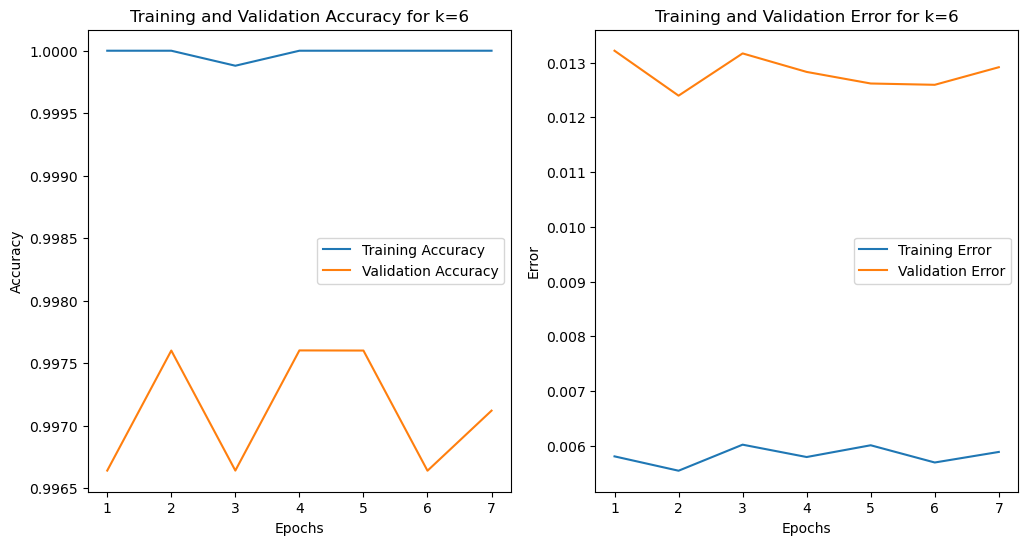

accuracy :  0.9980506822612085

              precision    recall  f1-score   support



           0       1.00      1.00      1.00       273

           1       1.00      1.00      1.00       240



    accuracy                           1.00       513

   macro avg       1.00      1.00      1.00       513

weighted avg       1.00      1.00      1.00       513




	Confusion Matrix:


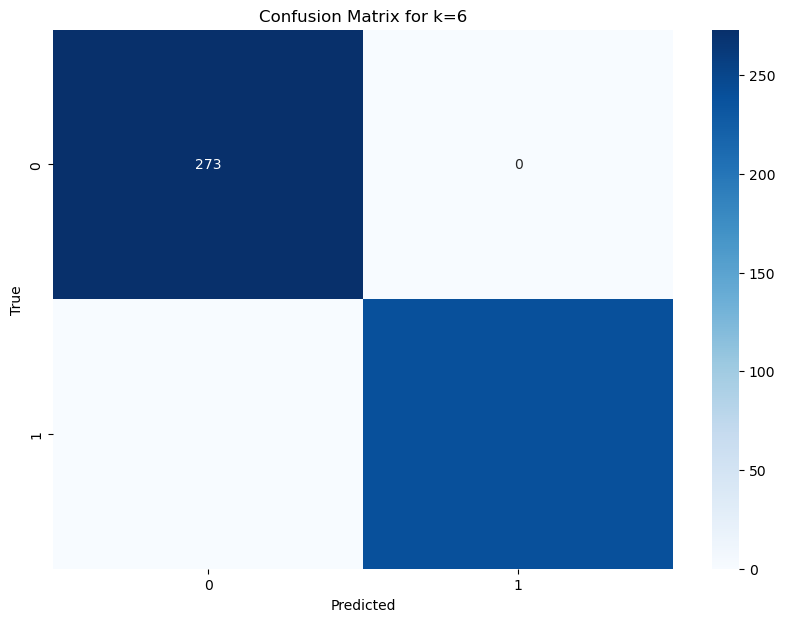


	Save model and vectorizer


In [61]:
def evaluate_kmers_ETC(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Initialize the ExtraTreesClassifier
    etc = ExtraTreesClassifier(random_state=42)

    # Define the parameter grid with more focus on regularization
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [4, 6, 8],
        'min_samples_leaf': [2, 3, 4],
        'bootstrap': [True]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = ExtraTreesClassifier(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path}models/classifierETC_tfidf_k={k}.joblib")
    # dump(model, f"{path}models/classifierETC_CV_k={k}.joblib")


# Example usage:
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_ETC(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### NB

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters found: {'alpha': 0.001}

Epoch 1/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 2/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 3/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 4/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 5/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 6/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation Error: 0.0000000

Epoch 7/30

	Training Accuracy: 1.0000000, Validation Accuracy: 1.0000000, Training Error: 0.0000000, Validation

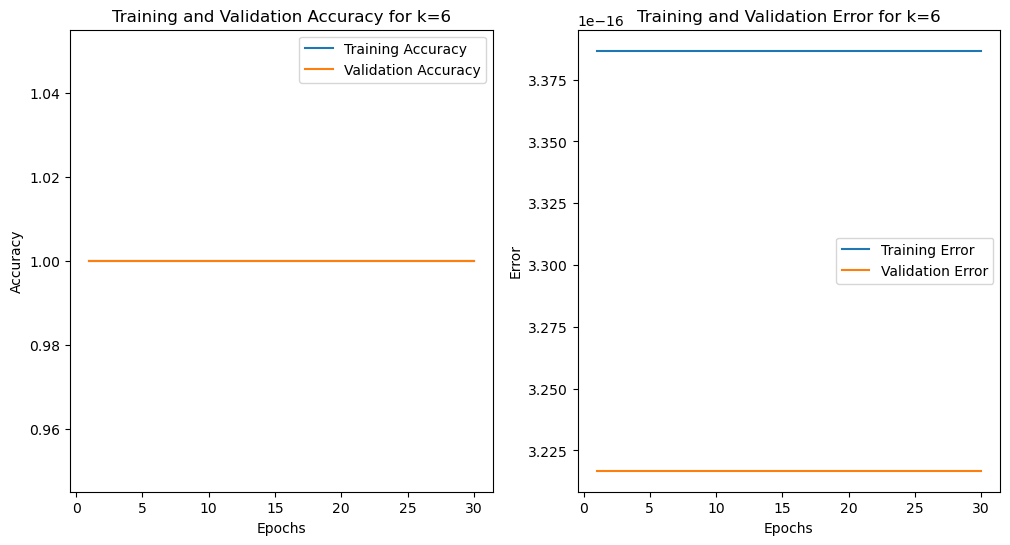

accuracy :  1.0

              precision    recall  f1-score   support



           0       1.00      1.00      1.00       273

           1       1.00      1.00      1.00       240



    accuracy                           1.00       513

   macro avg       1.00      1.00      1.00       513

weighted avg       1.00      1.00      1.00       513




	Confusion Matrix:


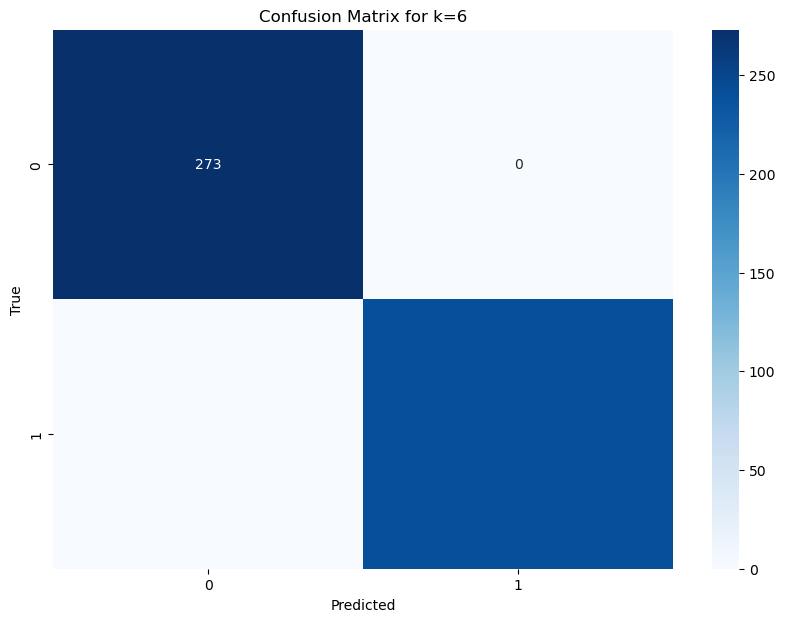


	Save model and vectorizer


In [62]:
def evaluate_kmers_NB(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = MultinomialNB()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 2,10.0]}  # You can add more hyperparameters here
    


    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = MultinomialNB(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path}models/classifierNB_tfidf_k={k}.joblib")
    # dump(model, f"{path}models/classifierNB_CV_k={k}.joblib")


# Example usage:
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_NB(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### SVM

In [65]:
def evaluate_kmers_SVM(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','poly','linear']
    }
    model = SVC()
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_
    # Initialize the model with best parameters
    model = SVC(**best_params,probability=True)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path}models/classifierSVM_tfidf_k={k}.joblib")
    # dump(model, f"{path}models/classifierSVM_CV_k={k}.joblib")


# Example usage:
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_SVM(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

Epoch 1/30

	Training Accuracy: 0.8513453, Validation Accuracy: 0.8419687, Training Error: 0.2418671, Validation Error: 0.2474655

Epoch 2/30


KeyboardInterrupt: 

##### SVM test

In [ ]:
svmmodel=load(path+"models/SVM_classifier_poly_k=5.joblib")
tfidfvectorizer=load(path+"models/vectorizer_k=5.joblib")

In [ ]:
tfidfvectorizer.vocabulary_

In [ ]:
tfidfvectorizer.get_feature_names_out()[:10]

In [ ]:
tfidfvectorizer.idf_[:10]

In [ ]:
seq=['atgagcttcaccgacgaggccgtgagcatcctgaccagcagcagcctgctggccaggagcctgctgggcaggaccagcgccctgaagaggaaggacgtgagccccagcagcatcagcagcgccaggaggaagagggagttcatcccccacgagaagaaggacgacggctactgggacaagaggaagaagaacaacgaggccgccaagaggagcagggagaagaggagggtgaacgacatggtgctggagaacagggtgctgaccctgctggaggagaacgccaggctgagggccgagctgctggccctgaagttcaggttcggcctgatcaaggaccccagcaacgccagcatcctgcccctgaccaccggcagctgcgtgccccagcccagcgcccagcactactacctgcccaggggcgacggcgcccaccacaccggccccatgcccagcaaccagagccccacccagagcgccccccccagcagcaggagcatcagggacaccagcagcatgagcgaggacagcggcttcagcacccccggcggcagcagcgtgggcagccccgtgttcttcgaggacaggctgagcgaccacggcaagctgagcccccacagggccgacgagctgtgctacgagagccaccacagccccagcgacctgctggccgtgggcaaccacaacatgcccagcaccaggctggagagcatggacggcatgaagagcctgccccacaagctgaggttcaagagccccggcggcggcgactgcgagaacctgggcgagaggcagagcgccgccatccccatggccaacgccagggtgcacagctacacccacgagggcgccggctactggaccccccacgacggcgaggacgccaggaaggtgatccagcagcagcacgtgaactacagccacaacgtgaacgccaacgagagccagtaccaggccgagaacagcatgctgaagagccagctgagcagcctgagcgaggaggtggcccagctgaagaagctgttcagcgagcagctgctgaccaagaccaac']

In [ ]:
seq= [seq for seq in Labled_data['Sequence']]
t = substituer_nucl(seq)
t  = [Kmers_funct(i, 5) for i in t ]
t  = join_kmers(t)
resu=tfidfvectorizer.transform(t)
svmmodel.predict(resu.toarray())

In [ ]:
label = svmmodel.predict_proba(resu)
label

In [ ]:
[[f"{prob:.3f}%" for prob in sample] for sample in (label * 100)]

#### Decesion Tree

Epoch 1/30

	Training Accuracy: 0.9955314, Validation Accuracy: 0.9869565, Training Error: 0.0086841, Validation Error: 0.1898840

Epoch 2/30

	Training Accuracy: 0.9973430, Validation Accuracy: 0.9903382, Training Error: 0.0056307, Validation Error: 0.3344128

Epoch 3/30

	Training Accuracy: 0.9962560, Validation Accuracy: 0.9874396, Training Error: 0.0065655, Validation Error: 0.2689884

Epoch 4/30

	Training Accuracy: 0.9969807, Validation Accuracy: 0.9888889, Training Error: 0.0072742, Validation Error: 0.2708970

Epoch 5/30

	Training Accuracy: 0.9969807, Validation Accuracy: 0.9850242, Training Error: 0.0073418, Validation Error: 0.2466130

	Early stopping at epoch 5


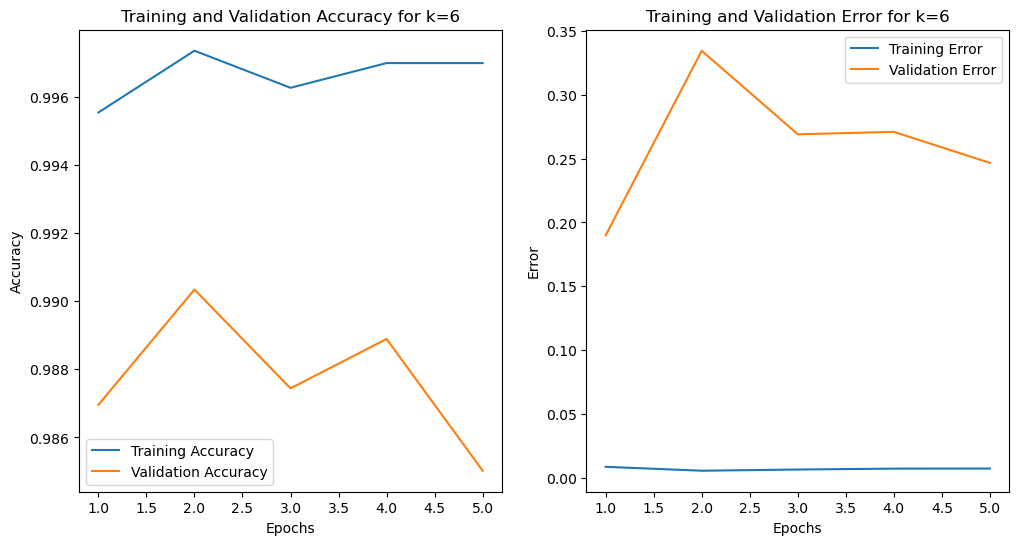

accuracy :  0.9824561403508771

              precision    recall  f1-score   support



           0       0.96      1.00      0.98       246

           1       1.00      0.97      0.98       267



    accuracy                           0.98       513

   macro avg       0.98      0.98      0.98       513

weighted avg       0.98      0.98      0.98       513




	Confusion Matrix:


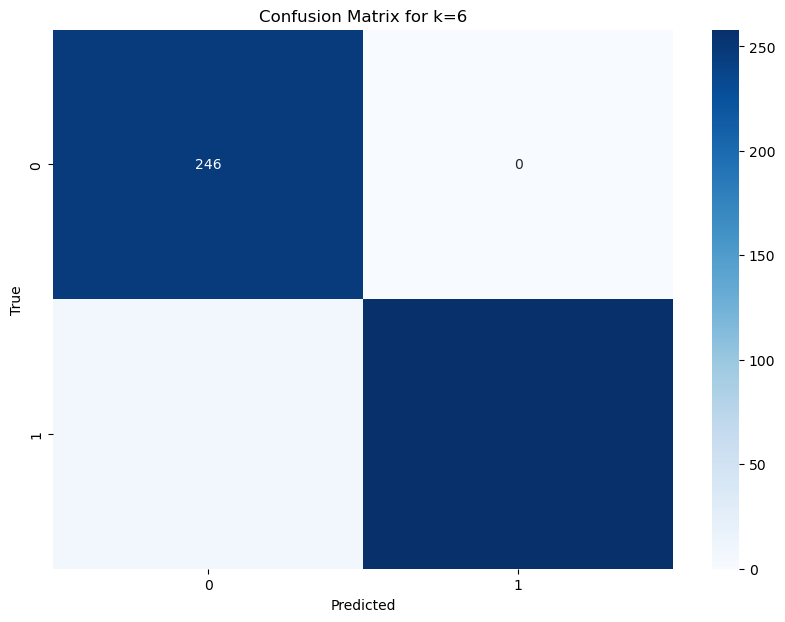


	Save model and vectorizer


In [128]:
def evaluate_kmers_DT(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    param_grid = {
        'criterion': ['gini', 'entropy'],            # Measure used to split the data
        'splitter': ['best', 'random'],              # Strategy used to choose the split at each node
        'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 5, 10],           # Minimum number of samples required to be at a leaf node
        'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
        'class_weight': [None, 'balanced']           # Weights associated with classes
    }
    model = DecisionTreeClassifier(random_state=42)    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = DecisionTreeClassifier(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path}models/classifierDT_tfidf_k={k}.joblib")
    # dump(model, f"{path}models/classifierSVM_CV_k={k}.joblib")


# Example usage:
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_DT(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### LazzyClassifier

In [123]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier

# Define the function to evaluate k-mers
def evaluate_kmers_LC(X_train, X_test, y_train, y_test):
    print("===============================================================\nEvaluating model performance")
    
    # Fit the models and get predictions
    print("========================================================================\n=> Fit the models and get predictions")
    classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = classifier.fit(X_train, X_test, y_train, y_test)

    # Print the model performance
    print("========================================================================\n=> Print the model performance")
    print(models)
    print(predictions)

# Assume sequences_train_final, sequences_val_final, y_train, y_val, sequences_test_final, and y_test are already defined

# Concatenate training and validation data
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
X_train_concat1 = X_train_concat.values
y_train_concat1 = y_train_concat.values
sequences_test_final1 = sequences_test_final.values
y_test1 = y_test.values

# Evaluate the models
evaluate_kmers_LC(X_train_concat1, sequences_test_final1, y_train_concat1, y_test1)



Evaluating model performance


=> Fit the models and get predictions


 97%|█████████▋| 28/29 [04:21<00:08,  8.41s/it]

[LightGBM] [Info] Number of positive: 1014, number of negative: 1035

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.532295 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 742372

[LightGBM] [Info] Number of data points in the train set: 2049, number of used features: 4089

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494876 -> initscore=-0.020499

[LightGBM] [Info] Start training from score -0.020499

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [04:45<00:00,  9.86s/it]


=> Print the model performance

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \

Model                                                                           

ExtraTreesClassifier               1.00               1.00     1.00      1.00   

PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   

LinearSVC                          1.00               1.00     1.00      1.00   

CalibratedClassifierCV             1.00               1.00     1.00      1.00   

SGDClassifier                      1.00               1.00     1.00      1.00   

Perceptron                         1.00               1.00     1.00      1.00   

LogisticRegression                 1.00               1.00     1.00      1.00   

BaggingClassifier                  1.00               1.00     1.00      1.00   

XGBClassifier                      1.00               1.00     1.00      1.00   

RandomForestClassifier             1.00               1.00     1.

### Deep learning

#### LSTM

##### with Embedding layer 

Epoch 1/30
26/26 - 338s - 13s/step - accuracy: 0.8096 - loss: 0.4048 - val_accuracy: 0.9927 - val_loss: 0.0450
Epoch 2/30
26/26 - 378s - 15s/step - accuracy: 0.9841 - loss: 0.0663 - val_accuracy: 0.9951 - val_loss: 0.0321
Epoch 3/30
26/26 - 384s - 15s/step - accuracy: 0.9927 - loss: 0.0392 - val_accuracy: 0.9951 - val_loss: 0.0228
Epoch 4/30
26/26 - 382s - 15s/step - accuracy: 0.9555 - loss: 0.1753 - val_accuracy: 0.8976 - val_loss: 0.2522
Epoch 5/30
26/26 - 378s - 15s/step - accuracy: 0.9671 - loss: 0.1190 - val_accuracy: 0.9951 - val_loss: 0.0332
Epoch 6/30
26/26 - 382s - 15s/step - accuracy: 0.9939 - loss: 0.0276 - val_accuracy: 0.9976 - val_loss: 0.0179
Epoch 7/30
26/26 - 384s - 15s/step - accuracy: 0.9945 - loss: 0.0240 - val_accuracy: 0.9951 - val_loss: 0.0311
Epoch 8/30
26/26 - 383s - 15s/step - accuracy: 0.9963 - loss: 0.0203 - val_accuracy: 0.9951 - val_loss: 0.0304
Epoch 9/30
26/26 - 382s - 15s/step - accuracy: 0.9969 - loss: 0.0175 - val_accuracy: 0.9951 - val_loss: 0.0293


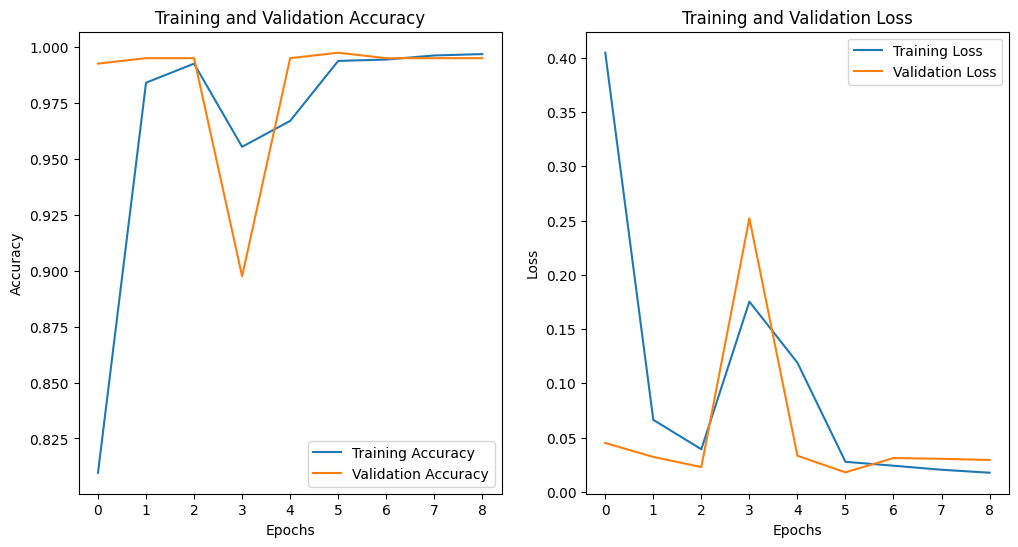

17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Predictions shape: (513, 1), Expected: (513,)
Test accuracy:  0.9961013645224172
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       252
           1       1.00      0.99      1.00       261

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513

[[252   0]
 [  2 259]]


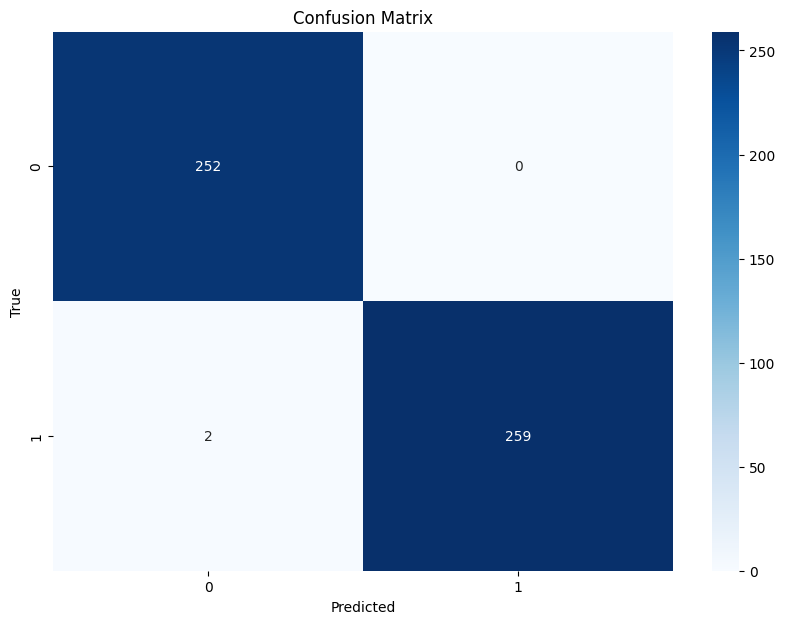

In [66]:

def evaluate_kmers_LSTM(X_train, X_test,X_val, y_train, y_test,y_val, epochs, patience=3, max_features=500, max_len=6094):
    # Tokenize the sequences
    tokenizer = Tokenizer(char_level=True, num_words=max_features)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)

    X_test_seq = tokenizer.texts_to_sequences(X_test)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
    
    X_val = tokenizer.texts_to_sequences(X_val)
    X_val = pad_sequences(X_val, maxlen=max_len)
    
    # save tokenizer
    with open(f"/kaggle/working/tokenizer.pkl", "wb") as file:
        pickle.dump(tokenizer, file)
    
    # Build LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=128))
    model.add(LSTM(100, input_shape=(max_len, 128), dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=64, validation_data=(X_val,y_val), callbacks=[early_stopping], verbose=2)

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test_pad)

    # Check the shape of the predictions
    print(f"Predictions shape: {y_test_pred.shape}, Expected: {y_test.shape}")
    
    # Apply thresholding for binary classification
    y_test_pred = (y_test_pred > 0.5).astype(int)
    
    # Flatten the predictions if necessary
    if len(y_test_pred.shape) > 1:
        y_test_pred = y_test_pred.flatten()
    
    # Now calculate accuracy
    final_score = accuracy_score(y_test, y_test_pred)
    print("Test accuracy: ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    plt.show()

    # Save the model
    model.save(f"/kaggle/working/lstm_model_tokenizer.h5")
evaluate_kmers_LSTM(X_train['Sequence'], X_test['Sequence'],X_val['Sequence'], y_train, y_test, y_val,epochs=30)

##### without Embedding layer : with CV and TFiDF

In [ ]:
def evaluate_kmers_LSTM(X_train, X_test, X_val, y_train, y_test, y_val,epochs, patience=3):

    print(f"=========================k={k}")
    padded_X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    padded_X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


    # Define LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(padded_X_train.shape[1], 1), dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Dropout(0.2))  # Adding a dropout layer for regularization

    # Second LSTM layer without return_sequences (as it's the last LSTM layer)
    model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.2))  # Another dropout layer

    # Adding a Dense hidden layer
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))  # Dropout for regularization    
    model.add(Dense(1, activation='sigmoid'))
    
    print("========================================================================\nmodel.summary")
    print(model.summary())
    print("========================================================================\ncompile/fit model")

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Train the model
    history = model.fit(padded_X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val,y_val), callbacks=[early_stopping], verbose=2)

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(padded_X_test)

    # Check the shape of the predictions
    print(f"Predictions shape: {y_test_pred.shape}, Expected: {y_test.shape}")
    
    # Apply thresholding for binary classification
    y_test_pred = (y_test_pred > 0.5).astype(int)
    
    # Flatten the predictions if necessary
    if len(y_test_pred.shape) > 1:
        y_test_pred = y_test_pred.flatten()
    
    # Now calculate accuracy
    final_score = accuracy_score(y_test, y_test_pred)
    print("Test accuracy: ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Save the model
    model.save(f"/kaggle/working/lstm_model_{vecto}_k={k}.h5")
    dump(vectorizer, f"/kaggle/working/{vecto}_vectorizer_lstm_k={k}.joblib")
    # model.save(f"{path}models/lstm_model_CV_k={k}.h5")
# num_features = len(features_to_keep)
# print(num_features)
# X_train_concat = np.concatenate([sequences_train_final, sequences_val_final], axis=0)
# y_train_concat = np.concatenate([y_train, y_val], axis=0)
evaluate_kmers_LSTM(sequences_train.toarray(), sequences_test.toarray(),sequences_val.toarray(), y_train, y_test, y_val, epochs=30)

=========================k=7
model.summary


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 30364, 100)     │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 30364, 100)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,601 (287.50 KB)

 Trainable params: 73,601 (287.50 KB)

 Non-trainable params: 0 (0.00 B)

None
compile/fit model
Epoch 1/30
26/26 - 4181s - 161s/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5073 - val_loss: 0.6930
Epoch 2/30
26/26 - 4009s - 154s/step - accuracy: 0.4960 - loss: 0.6936 - val_accuracy: 0.5073 - val_loss: 0.6931
Epoch 3/30
26/26 - 3993s - 154s/step - accuracy: 0.4796 - loss: 0.6933 - val_accuracy: 0.4927 - val_loss: 0.6932
Epoch 4/30
26/26 - 4027s - 155s/step - accuracy: 0.4899 - loss: 0.6933 - val_accuracy: 0.5073 - val_loss: 0.6930
Epoch 5/30
26/26 - 4191s - 161s/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5073 - val_loss: 0.6931
Epoch 6/30
26/26 - 4333s - 167s/step - accuracy: 0.5125 - loss: 0.6934 - val_accuracy: 0.5073 - val_loss: 0.6930
Epoch 7/30
26/26 - 4257s - 164s/step - accuracy: 0.5076 - loss: 0.6931 - val_accuracy: 0.5073 - val_loss: 0.6930
Epoch 8/30
26/26 - 4219s - 162s/step - accuracy: 0.4857 - loss: 0.6936 - val_accuracy: 0.5073 - val_loss: 0.6930
Epoch 9/30
